In [1]:
"""
maximum availible volume to pool into
"""
max_volume=500

"""
maximum availible volume to be taken out of well
"""
max_oligo_volume=80

"""
maximum availible volume to be taken out of well
"""
min_oligo_volume=5

# """
# target moles of oligo pmol
# """
# target_quantity=90

In [140]:
# !pip install google-colab


In [29]:
EXPERIMENT_NAME = "OVFF364"
# reading file
import pandas as pd
df_calculated =  pd.read_csv(f'./content/{EXPERIMENT_NAME}_calculated.csv', delimiter='\t', decimal=".")

df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_concentrations.csv', delimiter='\t', decimal=".")

"""
strip the text everywhere on data frame
"""
cols = df.select_dtypes(object).columns
df[cols] = df[cols].apply(lambda x: x.str.strip())
"""
and again
"""
cols = df_calculated.select_dtypes(object).columns
df_calculated[cols] = df_calculated[cols].apply(lambda x: x.str.strip())

"""
now merge cleaned dataframes
"""
merge = df.merge(df_calculated, on='where')
df = merge

df.to_csv(f'./content/{EXPERIMENT_NAME}_merged_input.csv', encoding='UTF8')

In [31]:
df['Nucleic Acid(ng/uL)']

0      1603.146
1      2565.612
2      3394.609
3      1954.935
4      2658.799
         ...   
139    1853.010
140    1795.824
141    1887.404
142    1637.783
143    1961.444
Name: Nucleic Acid(ng/uL), Length: 144, dtype: float64

In [32]:
# df['Nucleic Acid(ng/uL)'] = df['Nucleic Acid(ng/uL)'].str.replace(',','.').astype(float)
df['monoisotopic_mass'] = df['monoisotopic_mass'].astype(float)
df["pM/mkl"] = 1000*df['Nucleic Acid(ng/uL)']/df['monoisotopic_mass']
df=df.dropna()

# if target_quantity/min(df["pM/mkl"]) > 70:
#   print("ATTENTION! target quantity cannot be achieved - oligo concentration is too low!")
#   target_quantity=min(df["pM/mkl"])*30
#   print(f"target_quantity is set to {target_quantity:.2f} pmol instead.")

# df['mkl']=target_quantity/df["pM/mkl"]

# # if sum(df['mkl']) > 500 mkl:
# # if min(df['mkl']) < 0.2 mkl:

# df = df[df['seq'].notna()]
# volume_list = df['mkl'].to_list()

df

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl
0,C13,06.03.2023 12:26,F1-1 1,1603.146,1.714,1.304,48.580,28.351,33.0,340,0.659,Unnamedsequence_F1-0,#= 33,CTA GAG GGG AAT TGT TAT CCG CTC ACA ATT CCC,10088.51,158.908104
1,D13,06.03.2023 12:27,F1-1 2,2565.612,1.993,1.412,77.746,39.006,33.0,340,-0.572,Unnamedsequence_F1-1,#= 79,GGG AAT TGT GAG CGG ATA ACA ATT CCC CTC TAG AA...,24448.73,104.938457
2,E13,06.03.2023 12:28,F1-1 3,3394.609,1.740,1.498,102.867,59.115,33.0,340,-0.525,Unnamedsequence_F1-2,#= 76,CCA CGT CAG CCA GCC TGT TCT TGC GGT TTG GCG AA...,23317.90,145.579533
3,F13,06.03.2023 12:29,F1-1 4,1954.935,1.754,1.516,59.240,33.768,33.0,340,-0.928,Unnamedsequence_F1-3,#= 52,CCG CAA GAA CAG GCT GGC TGA CGT GGC TGG CGA TT...,16023.23,122.006300
4,G13,06.03.2023 12:29,F1-1 5,2658.799,1.859,1.428,80.570,43.338,33.0,340,-0.370,Unnamedsequence_F1-4,#= 59,CGG GAG GAT CGT CGG CCC ATG CCG GCG AAG TCA CG...,18274.67,145.490945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,N21,06.03.2023 16:09,F1-1 140,1853.010,1.832,1.427,56.152,30.643,33.0,340,-0.386,Unnamedsequence_F1-R_(pTZ/F),#= 40,CCT CGC GAA TGC ATC TAG ATC GTA AAT CTC CAT GG...,12255.90,151.193303
140,O21,06.03.2023 16:09,F1-1 141,1795.824,1.818,1.456,54.419,29.936,33.0,340,-0.319,Unnamedsequence_F2-F_(pTZ/F),#= 40,CGA CGG GCC CGG GAT CCG ATT CAG TCC CAT GGA GA...,12297.90,146.026883
141,P21,06.03.2023 16:10,F1-1 142,1887.404,1.802,1.459,57.194,31.744,33.0,340,0.260,Unnamedsequence_F2-R_(pTZ/F),#= 37,CCT CGC GAA TGC ATC TAG ATT CGA TGT CAT CGC TGA C,11300.28,167.022764
142,A22,06.03.2023 16:10,F1-1 143,1637.783,1.791,1.445,49.630,27.707,33.0,340,0.638,Unnamedsequence_F3-F_(pTZ/F),#= 37,CGA CGG GCC CGG GAT CCG ATC GTC AGC GAT GAC ATC G,11401.32,143.648542


In [33]:
# df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_concentrations.csv', delimiter=';', decimal=".")
# df.columns = df.columns.str.strip()
# df_calculated["where"] = df_calculated["where"].str.strip()
# merge = df.merge(df_calculated, on='where')
# merge

In [34]:
# df_calculated.tail(3)

In [35]:
# pd.merge(left=df_calculated, right=df, how='inner', on='where')

In [36]:
# df[df["where"].isin(df_calculated['where'])]

In [37]:
# pd.set_option('max.rows', 500)

In [38]:
# df_calculated.columns

In [41]:
# df_calculated.loc[269, 'where']

'N17'

In [42]:
# df.loc[16, 'where']

'C14'

In [152]:
# for elem in df_calculated["where"].unique():
#     print(repr(elem))

<font color='red'>NOTICE ME</font>

Bad data with space `^`

Чтобы такого избежать, лучше при чтении таблиц указывать тип данных для каждого из столбцов (если заранее известно их чисо и тд)

---

In [153]:
# df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_concentrations.csv', delimiter=';', decimal=".")
# merge = df.merge(df_calculated, on='where')
# merge

In [154]:
# df_calculated.merge(df, on="where")

In [155]:
# df_calculated.head(3)

In [44]:
# pool_1 = "TdT-"
# pool_2 = "p03_F2-"
# pool_3 = "p10_F1-"
# pool_4 = "p10_F2-"
pool_1 = "Unnamedsequence_F1-"
pool_2 = "Unnamedsequence_F2-"
pool_3 = "Unnamedsequence_F3-"


POOL_NAME=pool_1

df = df[df["code"].str.contains(f'^{POOL_NAME}\d+')]
df

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl
0,C13,06.03.2023 12:26,F1-1 1,1603.146,1.714,1.304,48.580,28.351,33.0,340,0.659,Unnamedsequence_F1-0,#= 33,CTA GAG GGG AAT TGT TAT CCG CTC ACA ATT CCC,10088.51,158.908104
1,D13,06.03.2023 12:27,F1-1 2,2565.612,1.993,1.412,77.746,39.006,33.0,340,-0.572,Unnamedsequence_F1-1,#= 79,GGG AAT TGT GAG CGG ATA ACA ATT CCC CTC TAG AA...,24448.73,104.938457
2,E13,06.03.2023 12:28,F1-1 3,3394.609,1.740,1.498,102.867,59.115,33.0,340,-0.525,Unnamedsequence_F1-2,#= 76,CCA CGT CAG CCA GCC TGT TCT TGC GGT TTG GCG AA...,23317.90,145.579533
3,F13,06.03.2023 12:29,F1-1 4,1954.935,1.754,1.516,59.240,33.768,33.0,340,-0.928,Unnamedsequence_F1-3,#= 52,CCG CAA GAA CAG GCT GGC TGA CGT GGC TGG CGA TT...,16023.23,122.006300
4,G13,06.03.2023 12:29,F1-1 5,2658.799,1.859,1.428,80.570,43.338,33.0,340,-0.370,Unnamedsequence_F1-4,#= 59,CGG GAG GAT CGT CGG CCC ATG CCG GCG AAG TCA CG...,18274.67,145.490945
5,H13,06.03.2023 12:30,F1-1 6,2690.067,1.703,1.340,81.517,47.857,33.0,340,-0.377,Unnamedsequence_F1-5,#= 54,CGG CAT GGG CCG ACG ATC CTC CCG CCA CCG TAT AC...,16434.51,163.684040
6,I13,06.03.2023 12:37,F1-1 7,1962.341,1.711,1.537,59.465,34.749,33.0,340,-0.896,Unnamedsequence_F1-6,#= 75,TCG TTG TTT CCC CAC GCC GTG AAT CCG TTC TGG AA...,23095.73,84.965533
7,J13,06.03.2023 12:38,F1-1 8,2346.592,1.796,1.387,71.109,39.595,33.0,340,-0.676,Unnamedsequence_F1-7,#= 57,CGG ATT CAC GGC GTG GGG AAA CAA CGA CAA TGT GC...,17588.28,133.417935
8,K13,06.03.2023 12:39,F1-1 9,2291.352,1.794,1.503,69.435,38.711,33.0,340,-0.262,Unnamedsequence_F1-8,#= 55,CGC TGT TGC TGC TGC CGA CCT GGC AGG AAC GTC CG...,16959.84,135.104576
9,L13,06.03.2023 12:39,F1-1 10,2023.572,1.753,1.372,61.320,34.980,33.0,340,0.196,Unnamedsequence_F1-9,#= 66,GCC AGG TCG GCA GCA GCA ACA GCG CTT TCG TCT CC...,20246.94,99.944584


Text(0, 0.5, 'occurencies')

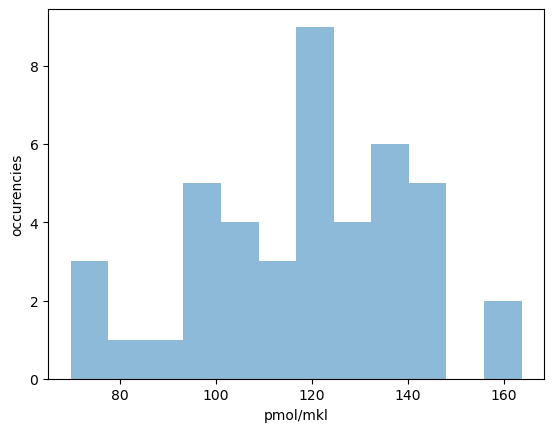

In [45]:
"""
смотрим распределение по корзинам
"""
ax = df['pM/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [46]:
'''
определяем выбросы
'''
import pandas
import numpy as np
from scipy import stats

# %reload_ext google.colab.data_table

df['score'] = np.abs(stats.zscore(df['pM/mkl']))<1.8
# df[(np.abs(stats.zscore(df)) < 1.5).all(axis=1)]
filtered, filtered_off = (df[(np.abs(stats.zscore(df['pM/mkl'])) < 1.8)], df[(np.abs(stats.zscore(df['pM/mkl'])) >= 1.8)])
filtered_off

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl,score
0,C13,06.03.2023 12:26,F1-1 1,1603.146,1.714,1.304,48.580,28.351,33.0,340,0.659,Unnamedsequence_F1-0,#= 33,CTA GAG GGG AAT TGT TAT CCG CTC ACA ATT CCC,10088.51,158.908104,False
5,H13,06.03.2023 12:30,F1-1 6,2690.067,1.703,1.340,81.517,47.857,33.0,340,-0.377,Unnamedsequence_F1-5,#= 54,CGG CAT GGG CCG ACG ATC CTC CCG CCA CCG TAT AC...,16434.51,163.684040,False
23,J14,06.03.2023 13:26,F1-1 24,1663.637,1.812,1.255,50.413,27.828,33.0,340,0.496,Unnamedsequence_F1-23,#= 71,CGA GGC CAT GGC AGC CTG GTC CGA ACG CGC CGG CG...,21963.01,75.747222,False
29,P14,06.03.2023 13:31,F1-1 30,1244.525,1.794,1.587,37.713,21.026,33.0,340,0.306,Unnamedsequence_F1-29,#= 57,TGA GCG GTG CGT CGG CGC ACT GGG GGC AGC GGG CG...,17832.32,69.790414,False
33,D15,06.03.2023 13:36,F1-1 34,1427.701,1.791,1.493,43.264,24.150,33.0,340,0.504,Unnamedsequence_F1-33,#= 60,GGC CTC GTT GTC GGC GGC CGT GTT CGG CTT GGG CG...,18583.82,76.824948,False


Text(0, 0.5, 'occurencies')

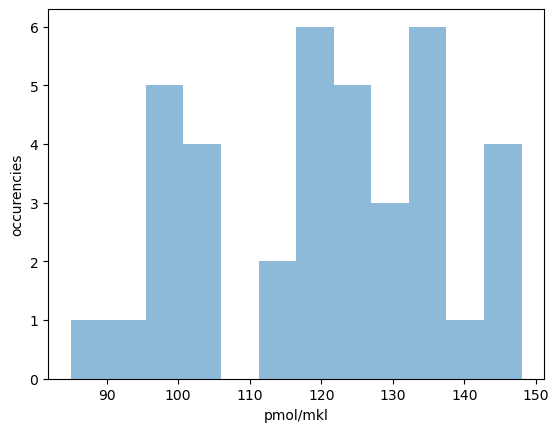

In [47]:
"""
смотрим распределение по корзинам
"""
ax = filtered['pM/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [48]:
"""
split into 7 bins by quantiles
"""
labels=["1", "2", "3", "4", "5", "6", "7"]
filtered["quantile"] = pd.qcut(df['pM/mkl'], q=[0, 0.05, 0.1, 0.35, 0.55, 0.9, 0.95, 1], labels=labels)

'''
выравниваем группы концентраций в пределах отличия в 1.5 раз
'''
for i in labels:
  filtered.loc[filtered['quantile'] == i, ['mkl']] = round(5*7/int(i))

"""
пересчитываем моли
"""
filtered['pmol'] = filtered['mkl']*filtered['pM/mkl']
median_conc = round(filtered['pM/mkl'].median())
median_moles_in_pool = round(filtered['pmol'].median())
# print(filtered.sort_values('pM/mkl'))
print(f"equalized result: median_moles_in_pool = {median_moles_in_pool}")
filtered

equalized result: median_moles_in_pool = 1060


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl,score,quantile,mkl,pmol
1,D13,06.03.2023 12:27,F1-1 2,2565.612,1.993,1.412,77.746,39.006,33.0,340,-0.572,Unnamedsequence_F1-1,#= 79,GGG AAT TGT GAG CGG ATA ACA ATT CCC CTC TAG AA...,24448.73,104.938457,True,3,12.0,1259.261483
2,E13,06.03.2023 12:28,F1-1 3,3394.609,1.740,1.498,102.867,59.115,33.0,340,-0.525,Unnamedsequence_F1-2,#= 76,CCA CGT CAG CCA GCC TGT TCT TGC GGT TTG GCG AA...,23317.90,145.579533,True,6,6.0,873.477200
3,F13,06.03.2023 12:29,F1-1 4,1954.935,1.754,1.516,59.240,33.768,33.0,340,-0.928,Unnamedsequence_F1-3,#= 52,CCG CAA GAA CAG GCT GGC TGA CGT GGC TGG CGA TT...,16023.23,122.006300,True,4,9.0,1098.056696
4,G13,06.03.2023 12:29,F1-1 5,2658.799,1.859,1.428,80.570,43.338,33.0,340,-0.370,Unnamedsequence_F1-4,#= 59,CGG GAG GAT CGT CGG CCC ATG CCG GCG AAG TCA CG...,18274.67,145.490945,True,6,6.0,872.945667
6,I13,06.03.2023 12:37,F1-1 7,1962.341,1.711,1.537,59.465,34.749,33.0,340,-0.896,Unnamedsequence_F1-6,#= 75,TCG TTG TTT CCC CAC GCC GTG AAT CCG TTC TGG AA...,23095.73,84.965533,True,2,18.0,1529.379587
7,J13,06.03.2023 12:38,F1-1 8,2346.592,1.796,1.387,71.109,39.595,33.0,340,-0.676,Unnamedsequence_F1-7,#= 57,CGG ATT CAC GGC GTG GGG AAA CAA CGA CAA TGT GC...,17588.28,133.417935,True,5,7.0,933.925546
8,K13,06.03.2023 12:39,F1-1 9,2291.352,1.794,1.503,69.435,38.711,33.0,340,-0.262,Unnamedsequence_F1-8,#= 55,CGC TGT TGC TGC TGC CGA CCT GGC AGG AAC GTC CG...,16959.84,135.104576,True,5,7.0,945.732035
9,L13,06.03.2023 12:39,F1-1 10,2023.572,1.753,1.372,61.320,34.980,33.0,340,0.196,Unnamedsequence_F1-9,#= 66,GCC AGG TCG GCA GCA GCA ACA GCG CTT TCG TCT CC...,20246.94,99.944584,True,3,12.0,1199.335011
10,M13,06.03.2023 12:40,F1-1 11,2094.228,1.702,1.577,63.461,37.284,33.0,340,-0.141,Unnamedsequence_F1-10,#= 65,GTT CGG CCT CGA CCG CTT CCT GCA TGC GAT GTT CG...,19991.75,104.754611,True,3,12.0,1257.055335
11,N13,06.03.2023 12:41,F1-1 12,2303.261,1.809,1.389,69.796,38.577,33.0,340,-0.400,Unnamedsequence_F1-11,#= 64,CAT GCA GGA AGC GGT CGA GGC CGA ACG CGC CGG CA...,19743.61,116.658554,True,4,9.0,1049.926989


In [49]:
filtered_off['mkl'] = median_moles_in_pool/filtered_off['pM/mkl']
filtered_off.loc[filtered_off['mkl'] >= max_oligo_volume, ['mkl']] = max_oligo_volume
filtered_off.loc[filtered_off['mkl'] <= min_oligo_volume, ['mkl']] = min_oligo_volume
filtered_off['mkl'] = round(filtered_off['mkl'])
filtered_off

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl,score,mkl
0,C13,06.03.2023 12:26,F1-1 1,1603.146,1.714,1.304,48.580,28.351,33.0,340,0.659,Unnamedsequence_F1-0,#= 33,CTA GAG GGG AAT TGT TAT CCG CTC ACA ATT CCC,10088.51,158.908104,False,7.0
5,H13,06.03.2023 12:30,F1-1 6,2690.067,1.703,1.340,81.517,47.857,33.0,340,-0.377,Unnamedsequence_F1-5,#= 54,CGG CAT GGG CCG ACG ATC CTC CCG CCA CCG TAT AC...,16434.51,163.684040,False,6.0
23,J14,06.03.2023 13:26,F1-1 24,1663.637,1.812,1.255,50.413,27.828,33.0,340,0.496,Unnamedsequence_F1-23,#= 71,CGA GGC CAT GGC AGC CTG GTC CGA ACG CGC CGG CG...,21963.01,75.747222,False,14.0
29,P14,06.03.2023 13:31,F1-1 30,1244.525,1.794,1.587,37.713,21.026,33.0,340,0.306,Unnamedsequence_F1-29,#= 57,TGA GCG GTG CGT CGG CGC ACT GGG GGC AGC GGG CG...,17832.32,69.790414,False,15.0
33,D15,06.03.2023 13:36,F1-1 34,1427.701,1.791,1.493,43.264,24.150,33.0,340,0.504,Unnamedsequence_F1-33,#= 60,GGC CTC GTT GTC GGC GGC CGT GTT CGG CTT GGG CG...,18583.82,76.824948,False,14.0


In [50]:
"""
FINAL CONCATENATION AND VOLUME ASSERTION TEST
"""
result = pd.concat([filtered_off, filtered])
result['pmol'] = result['mkl']*result['pM/mkl']
total = result['mkl'].sum()
result['final conc, pmol/mkl'] = round(result['pmol']/total, 2)
print(f"calculated total volume of pool: {total} mkl")
# assert total < total_volume, "max volume exceeded"

'''
если пул больше max_volume (500 мкл) - разбиваем на столько пробирок, сколько потребуется
'''
pool_index_list = []
sum = 0
for i in result['mkl']:
  sum+=i
  pool_index_list+=[round(1+sum//max_volume)]

result['target_well'] = pool_index_list

'''
проверяем, что у нас нет разницы концентраций на порядок
'''
assert min(result['final conc, pmol/mkl'])*10 > max(result['final conc, pmol/mkl']), "разброс концентраций превышает 1 порядок!!!\nЭто непорядок!!!"
"""
если все хорошо - идем дальше
"""
result.sort_index(inplace=True)
result
print(f"разбито на {max(pool_index_list)} пробирки(ок)")

calculated total volume of pool: 408.0 mkl
разбито на 1 пробирки(ок)


In [163]:
"""
FINALWORKLIST EXPORT
"""
volume_list = round(result['mkl'], 0).astype(int)


"""
читаем файл из програмы Глеба
"""
worklist_df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_worklist.csv', delimiter=',', header=None)
worklist_df.reset_index(drop=True)
# drop NaN seq
worklist_df[4] = volume_list
worklist_df[4] = worklist_df[4]
worklist_df[4]
worklist_df[3] = pool_index_list

"""
экспортируем новый worklist
"""
worklist_df.to_csv(f'./content/{EXPERIMENT_NAME}_equalized_conc_worklist.csv', encoding='UTF8')

final_equalized_oligo_concentration=median_moles_in_pool/worklist_df[4].sum()
total_volume=worklist_df[4].sum()


print(f"final_equalized_oligo_concentration = ~{final_equalized_oligo_concentration:.3f} pmol/mkl")
print(f"total_volume = {total_volume:.1f} mkl")
print(f"minimal taken volume = {min(worklist_df[4]):.2f} mkl")
print(f"max taken volume = {max(worklist_df[4]):.2f} mkl")
print(f"max разброс финальных концентраций = {100*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f}% или в {2*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f} раз")
print(f"среднее значение концентраций {result['final conc, pmol/mkl'].mean():.3f}±{result['final conc, pmol/mkl'].std():.3f} pmol/mkl")

FileNotFoundError: [Errno 2] No such file or directory: './content/OVFF358_worklist.csv'

In [55]:
"""
FINALWORKLIST EXPORT
"""
volume_list = round(result['mkl'], 0).astype(int)
number_of_wells = len(volume_list)

def coordinate_to_number_parser(list_of_coords):
    '''
    переводит координату на плашке из формата A1 в порядковый номер
    '''
    index_list = []
    for i in list_of_coords: 
        
        row = ord(i[0]) - 64
        column = int(i[1:])
        index_list += [16*(column-1)+row]
    
    return index_list

list_of_indexes = coordinate_to_number_parser(result["where"].to_list())

col1 = ["384well"]*number_of_wells
col2 = list_of_indexes
col3 = ["96well"]*number_of_wells
col4 = pool_index_list
col5 = volume_list.to_list()

list_of_lists = [col1, col2, col3, col4, col5]

worklist_df = pd.DataFrame(list_of_lists)
worklist_df = worklist_df.reset_index(drop=True)
worklist_df = worklist_df.T

"""
экспортируем новый worklist
"""
worklist_df.to_csv(f'./content/{EXPERIMENT_NAME}_equalized_conc_worklist_{POOL_NAME}.csv', encoding='UTF8', header=None, index=False)


"""
SOME METADATA
"""
final_equalized_oligo_concentration=median_moles_in_pool/exported_df[4].sum()
total_volume=exported_df[4].sum()


print(f"final_equalized_oligo_concentration = ~{final_equalized_oligo_concentration:.3f} pmol/mkl")
print(f"total_volume = {total_volume:.1f} mkl")
print(f"minimal taken volume = {min(worklist_df[4]):.2f} mkl")
print(f"max taken volume = {max(worklist_df[4]):.2f} mkl")
print(f"max разброс финальных концентраций = {100*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f}% или в {2*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f} раз")
print(f"среднее значение концентраций {result['final conc, pmol/mkl'].mean():.3f}±{result['final conc, pmol/mkl'].std():.3f} pmol/mkl")

final_equalized_oligo_concentration = ~2.598 pmol/mkl
total_volume = 408.0 mkl
minimal taken volume = 5.00 mkl
max taken volume = 18.00 mkl
max разброс финальных концентраций = 86.28% или в 1.73 раз
среднее значение концентраций 2.619±0.440 pmol/mkl


Text(0, 0.5, 'occurencies')

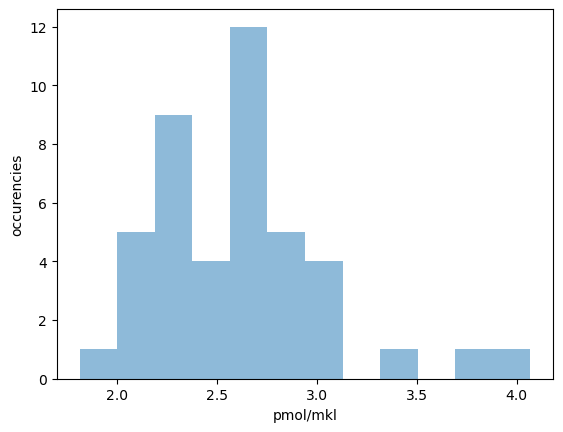

In [53]:
"""
смотрим распределение по корзинам
"""
ax = result['final conc, pmol/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [132]:
"""
Сравниваем 4 эксперимента - с выравниванием и без + эти два с очисткой на магнитных частицах
Как сравнивать? 
Можно ли одновременно на риалтаймнике?
"""

'\nСравниваем 4 эксперимента - с выравниванием и без + эти два с очисткой на магнитных частицах\nКак сравнивать? \nМожно ли одновременно на риалтаймнике?\n'

In [54]:
result

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),...,length,seq,monoisotopic_mass,pM/mkl,score,mkl,quantile,pmol,"final conc, pmol/mkl",target_well
0,C13,06.03.2023 12:26,F1-1 1,1603.146,1.714,1.304,48.580,28.351,33.0,340,...,#= 33,CTA GAG GGG AAT TGT TAT CCG CTC ACA ATT CCC,10088.51,158.908104,False,7.0,NaN,1112.356731,2.73,1
1,D13,06.03.2023 12:27,F1-1 2,2565.612,1.993,1.412,77.746,39.006,33.0,340,...,#= 79,GGG AAT TGT GAG CGG ATA ACA ATT CCC CTC TAG AA...,24448.73,104.938457,True,12.0,3,1259.261483,3.09,1
2,E13,06.03.2023 12:28,F1-1 3,3394.609,1.740,1.498,102.867,59.115,33.0,340,...,#= 76,CCA CGT CAG CCA GCC TGT TCT TGC GGT TTG GCG AA...,23317.90,145.579533,True,6.0,6,873.477200,2.14,1
3,F13,06.03.2023 12:29,F1-1 4,1954.935,1.754,1.516,59.240,33.768,33.0,340,...,#= 52,CCG CAA GAA CAG GCT GGC TGA CGT GGC TGG CGA TT...,16023.23,122.006300,True,9.0,4,1098.056696,2.69,1
4,G13,06.03.2023 12:29,F1-1 5,2658.799,1.859,1.428,80.570,43.338,33.0,340,...,#= 59,CGG GAG GAT CGT CGG CCC ATG CCG GCG AAG TCA CG...,18274.67,145.490945,True,6.0,6,872.945667,2.14,1
5,H13,06.03.2023 12:30,F1-1 6,2690.067,1.703,1.340,81.517,47.857,33.0,340,...,#= 54,CGG CAT GGG CCG ACG ATC CTC CCG CCA CCG TAT AC...,16434.51,163.684040,False,6.0,NaN,982.104243,2.41,1
6,I13,06.03.2023 12:37,F1-1 7,1962.341,1.711,1.537,59.465,34.749,33.0,340,...,#= 75,TCG TTG TTT CCC CAC GCC GTG AAT CCG TTC TGG AA...,23095.73,84.965533,True,18.0,2,1529.379587,3.75,1
7,J13,06.03.2023 12:38,F1-1 8,2346.592,1.796,1.387,71.109,39.595,33.0,340,...,#= 57,CGG ATT CAC GGC GTG GGG AAA CAA CGA CAA TGT GC...,17588.28,133.417935,True,7.0,5,933.925546,2.29,1
8,K13,06.03.2023 12:39,F1-1 9,2291.352,1.794,1.503,69.435,38.711,33.0,340,...,#= 55,CGC TGT TGC TGC TGC CGA CCT GGC AGG AAC GTC CG...,16959.84,135.104576,True,7.0,5,945.732035,2.32,1
9,L13,06.03.2023 12:39,F1-1 10,2023.572,1.753,1.372,61.320,34.980,33.0,340,...,#= 66,GCC AGG TCG GCA GCA GCA ACA GCG CTT TCG TCT CC...,20246.94,99.944584,True,12.0,3,1199.335011,2.94,1
